# Step 1: Define the data and classes

In [3]:
import os
import codecs

def read_in(folder):
    files = os.listdir(folder)
    a_list = []
    for a_file in files:
        if not a_file.startswith("."):
            f = codecs.open(folder + a_file, "r", encoding = "ISO-8859-1", errors="ignore")
            a_list.append(f.read())
            f.close()
    return a_list

## Verify the data is correct

In [4]:
spam_list = read_in("enron1/spam/")
ham_list = read_in("enron1/ham/")

print(len(spam_list))
print(len(ham_list))
print(spam_list[0])
print(ham_list[0])

1500
3672
Subject: urgent message
Mr francis oma
Attn: director/ceo,
A cry for family help.
I am mr francis oma the first son of the late mr. Peter oma. My father had served mr b. H. Lions who was an irish citizen and a successful farmer in our remote village. My father served him for many years and inherited his farm after his death. My father became an executive member of the farmers association in the western mashonaland province of zimbabwe. He also became a successful businessman, because of the recent uprising in my country and the war veterans and farmers clashing, my father decided that it would be safer if my younger brother and I move to south africa to escape the violence.
We left zimbabwe with two boxes containing the sum of us $11. 5 m (eleven million, five hundred thousand united states dollars only) and valuables (diamonds) worth us $5 m. My father has instructed us to deposit it with a private security company on our arrival.
He also instructed me not to reveal the cont

## Combine data into a single structure

In [5]:
import random

all_emails = [(email_content, "spam") for email_content in spam_list]
all_emails += [(email_content, "ham") for email_content in ham_list]

random.seed(42)
random.shuffle(all_emails)

print("Dataset size = " + str(len(all_emails)) + " emails")

Dataset size = 5172 emails


# Step 2: Split the text into words

In [7]:
import nltk
from nltk import word_tokenize

def tokenize(input):
    word_list = []
    for word in word_tokenize(input):
        word_list.append(word)
    return word_list

input = "What's the best way to split a sentence into words?"
print(tokenize(input))

['What', "'s", 'the', 'best', 'way', 'to', 'split', 'a', 'sentence', 'into', 'words', '?']


# Step 3: Extract and normalize the features

In [8]:
def get_features(text):
    features = {}
    word_list = [word for word in word_tokenize(text.lower())]
    for word in word_list:
        features[word] = True
    return features

all_features = [(get_features(email), label) for (email, label) in all_emails]

print(get_features("Participate In Out New Lottery NOW!"))
print(len(all_features))
print(len(all_features[0][0]))
print(len(all_features[99][0]))

{'participate': True, 'in': True, 'out': True, 'new': True, 'lottery': True, 'now': True, '!': True}
5172
57
131


## Code to train a Naïve Bayer classifier

In [16]:
from nltk import NaiveBayesClassifier, classify

def train(features, proportion):
    train_size = int(len(features) * proportion)
    train_set, test_set = features[:train_size], features[train_size:]
    print("Training set size = " + str(len(train_set)) + " emails")
    print("Test set size = " + str(len(test_set)) + " emails")
    classifier = NaiveBayesClassifier.train(train_set)
    return train_set, test_set, classifier

train_set, test_set, classifier = train(all_features, 0.8)

Training set size = 4137 emails
Test set size = 1035 emails


# Step 5: Evaluate your classifier

In [17]:
def evaluate(train_set, test_set, classifier):
    print("Accuracy on the training set = " + str(classify.accuracy(classifier, train_set)))
    print("Accuracy of the test set = " + str(classify.accuracy(classifier, test_set)))
    classifier.show_most_informative_features(50)

evaluate(train_set, test_set, classifier)

Accuracy on the training set = 0.9627749576988156
Accuracy of the test set = 0.9468599033816425
Most Informative Features
            prescription = True             spam : ham    =    129.3 : 1.0
                     nom = True              ham : spam   =    126.6 : 1.0
                    pain = True             spam : ham    =     97.2 : 1.0
                   cheap = True             spam : ham    =     89.1 : 1.0
                    2005 = True             spam : ham    =     87.5 : 1.0
                     sex = True             spam : ham    =     85.9 : 1.0
                    spam = True             spam : ham    =     85.9 : 1.0
                   super = True             spam : ham    =     82.7 : 1.0
                     ect = True              ham : spam   =     76.0 : 1.0
                  weight = True             spam : ham    =     71.5 : 1.0
              nomination = True              ham : spam   =     71.2 : 1.0
                  differ = True             spam : ha

## Code to check the contexts of specific words

In [18]:
from nltk.text import Text

def concordance(data_list, search_word):
    for email in data_list:
        word_list = [word for word in word_tokenize(email.lower())]
        text_list = Text(word_list)
        if search_word in word_list:
            text_list.concordance(search_word)

print("STOCKS in HAM:")
concordance(ham_list, "stocks")
print("\n\nSTOCKS in SPAM:")
concordance(spam_list, "stocks")

STOCKS in HAM:
Displaying 1 of 1 matches:
ad my portfolio is diversified into stocks that have lost even more money than
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files


STOCKS in SPAM:
Displaying 1 of 1 matches:
ecializing in undervalued small cap stocks for immediate breakout erhc and exx
Displaying 3 of 3 matches:
torage inc. play of the week tracks stocks on downward trends , foresees botto
his email pertaining to investing , stocks , securities must be understood as 
ntative before deciding to trade in stocks featured within this email . none o
Displaying 3 of 3 matches:
might occur . as with many microcap stocks , today ' s company has additiona |
his email pertaining to investing , stocks , securities must be und

Displaying 3 of 3 matches:
 statements . as with many microcap stocks , today ' s company has additiona |
is report pertaining to investing , stocks , securities must be understood as 
ntative before deciding to trade in stocks featured within this report . none 
Displaying 2 of 2 matches:
 % on regular price we have massive stocks of drugs for same day dispatch fast
e do have the lowest price and huge stocks ready for same - day dispatch . two
Displaying 3 of 3 matches:
n how many times have you seen good stocks but you couldn ' t get your hands o
his email pertaining to investing , stocks , securities must be understood as 
ntative before deciding to trade in stocks featured within this email . none o
Displaying 2 of 2 matches:
ng their gains . select gold mining stocks are the hot flyers of the otc . his
is letter cautions that micro - cap stocks are high - risk investments and tha
Displaying 1 of 1 matches:
or information puposes only . penny stocks are considered highly speculativ

# REDDIT Project

In [21]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/imanol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/imanol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Setting up SQLite database and Reddit API client

In [49]:
import praw
import sqlite3

conn = sqlite3.connect('reddit.db')
c = conn.cursor()

c.execute('''DROP TABLE IF EXISTS topics''')
c.execute('''DROP TABLE IF EXISTS comments''')
c.execute('''CREATE TABLE topics (topicTitle text, topicText text, topicID text, topicCategory text)''')
c.execute('''CREATE TABLE comments (commentText text, commentID text, topicTitle text, topicText text, topicID text, topicCategory text)''')

user_agent = "Introducing Data Science Book"
client_id = "*"
client_secret="*"
r = praw.Reddit(user_agent=user_agent, client_id=client_id, client_secret=client_secret)

subreddits = ['datascience', 'gameofthrones']

limit = 1000

def prawGetData(limit, subredditName):
    topics = r.subreddit(subredditName).hot(limit=limit)
    commentInsert=[]
    topicInsert=[]
    topicNBR=1
    for topic in topics:
        if (float(topicNBR)/limit)*100 in range(1, 100):
            print('***** TOPIC:' + str(topic.id) + ' ****COMPLETE: ' + str((float(topicNBR)/limit)*100) + '% ***')
        topicNBR += 1
        try:
            topicInsert.append((topic.title, topic.selftext, topic.id, subredditName))
        except:
            pass
        try:
            for comment in topic.comments:
                commentInsert.append((comment.body, comment.id, topic.title, topic.selftext, topic.id, subredditName))
        except:
            pass
    print('***************************')
    print('INSERTING DATA INTO SQLITE')
    c.executemany('INSERT INTO topics VALUES (?,?,?,?)', topicInsert)
    print('INSERTED TOPICS')
    c.executemany('INSERT INTO comments VALUES (?,?,?,?,?,?)', commentInsert)
    print('INSERTED COMMENTS')
    conn.commit()
    

for subject in subreddits:
    prawGetData(limit=limit, subredditName=subject)

***** TOPIC:fevs7x ****COMPLETE: 1.0% ***
***** TOPIC:feq8xe ****COMPLETE: 2.0% ***
***** TOPIC:fereer ****COMPLETE: 3.0% ***
***** TOPIC:fe2zlj ****COMPLETE: 4.0% ***
***** TOPIC:fe3kx4 ****COMPLETE: 5.0% ***
***** TOPIC:fdfcx1 ****COMPLETE: 6.0% ***
***** TOPIC:fd851w ****COMPLETE: 8.0% ***
***** TOPIC:fdacnm ****COMPLETE: 9.0% ***
***** TOPIC:fcnm3a ****COMPLETE: 10.0% ***
***** TOPIC:fcg4le ****COMPLETE: 11.0% ***
***** TOPIC:fcixec ****COMPLETE: 12.0% ***
***** TOPIC:fc401v ****COMPLETE: 13.0% ***
***** TOPIC:fbo2bv ****COMPLETE: 15.0% ***
***** TOPIC:fauraj ****COMPLETE: 16.0% ***
***** TOPIC:fb88hc ****COMPLETE: 17.0% ***
***** TOPIC:fafv6w ****COMPLETE: 18.0% ***
***** TOPIC:fauuzt ****COMPLETE: 19.0% ***
***** TOPIC:fanv6r ****COMPLETE: 20.0% ***
***** TOPIC:fak4k0 ****COMPLETE: 21.0% ***
***** TOPIC:fagiki ****COMPLETE: 22.0% ***
***** TOPIC:f9qtz8 ****COMPLETE: 23.0% ***
***** TOPIC:f9lx01 ****COMPLETE: 24.0% ***
***** TOPIC:f8tmxa ****COMPLETE: 25.0% ***
***** TOPIC:f8we53 

## Step 3: Data preparation

In [50]:
import sqlite3
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

nltk.download('punkt')
nltk.download('stopwords')

conn = sqlite3.connect('reddit.db')
c = conn.cursor()

[nltk_data] Downloading package punkt to /home/imanol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/imanol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered

stopwords = nltk.corpus.stopwords.words('english')

def lowerCaseArray(wordrow):
    lowercased = [word.lower() for word in wordrow]
    return lowercased

In [53]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
def data_processing(sql):
    c.execute(sql)
    data = {'wordMatrix': [], 'all_words': []}
    row = c.fetchone()
    while row is not None:
        wordrow = nltk.tokenize.word_tokenize(row[0] + " " + row[1])
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords, wordrow_lowercased)
        data['all_words'].extend(wordrow_nostopwords)
        data['wordMatrix'].append(wordrow_nostopwords)
        row = c.fetchone()
    return data

subreddits = ['datascience', 'gameofthrones']
data = {}
for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT topicTitle, topicText, topicCategory FROM topics WHERE topicCategory = ''' + "'" + subject + "'")

In [58]:
print(data['datascience']['wordMatrix'][10])

['feature', 'engineering', 'first', ',', 'hyper-parameter', 'tuning', 'first', ',', 'time', '?', 'currently', 'using', 'rf', 'models', ',', 'sure', 'set', 'max', 'depth', 'large', 'number', 'allows', 'features', 'analyzed', 'better', 'way', '?']


# Step 4: Data exploration

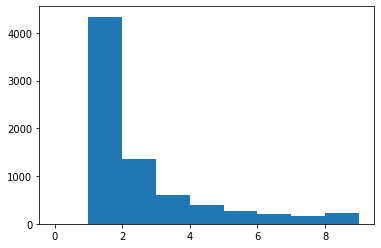

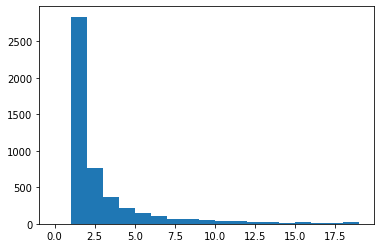

In [60]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()

wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

## Least frequent terms

In [61]:
print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

['08', 'woefully', 'proud', 'data-prep', 'dbas', 'sped', 'temporary', '*when*', '//selectstarsql.com/', 'higher-order', 'science/ml', 'stricter', 'proving', 'causation', 'star-format', '//www.zipjob.com/blog/star-method-resume/', 'affiliated', 'placed', 'subvert', 'mimic', 'click-velocity', 'time-of-day', 'ip', 'caused', 'damage', 'savings', 'wrongly', 'exposition', 'unnecessary', 'intimately', 'flesh', 'sort-of', 'overload', 'jargon-density', 'eye-ball', 'reject', 'easy-to-understand', 'overworked', 'skim', 'one-liner', 'keyword-density', 'ml-specific', 'unlikely', 'distribute', 'inventory', 'geocoded', 'hot', 'pov', 'scraper', 'season', 'granted', 'paragraphs', 'tripadvisor', 'collecting', "'scraping", '1500', 'nonspecific', 'non-classifiable', 'unclassifiable', 'classifiable', 'dumping', 'nonclassifiable', "'other'", 'hyper-parameter', 'rf', 'formatting/calculating', 'rarely', 'troubleshooting', 'communicating', 'building/editing', 'imo', 'boils', 'rpi', 'upstate', 'science/consulti

## Most frequent terms

In [62]:
print(wordfreqs_cat1.most_common(20))
print(wordfreqs_cat2.most_common(20))

[('.', 3624), (',', 3387), ('data', 1689), ('?', 1514), (')', 1015), ('(', 974), (':', 793), ('science', 627), ('would', 448), ("'m", 432), ('like', 397), ("'s", 347), ('&', 339), ("n't", 321), ('’', 318), ('https', 317), ('[', 302), (']', 302), ('!', 286), ('work', 276)]
[('.', 1501), (',', 1196), ('[', 553), (']', 553), ('spoilers', 531), ('?', 393), (')', 233), ('’', 229), ("'s", 217), ('(', 215), ('would', 192), ("n't", 166), (':', 161), ('like', 145), ('show', 143), ('season', 126), ('!', 119), ('got', 118), ('one', 116), ('jon', 113)]


## Step 3 revisited: Data preparation adapted

In [80]:
stemmer = nltk.SnowballStemmer("english")

def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed

manual_stopwords = [',', '://', '´', '’', '.', ')', '(', 'm', "'m", "n't", 'e.g', "'ve'", 's', '#', '/'
                   , '``', "'s", "''", '!', 'r', ']', '=', '[', 's', '&', '%', '*', '...', '1', '2', '3',
                   '4', '5', '6', '7', '8', '9', '10', '--', ';', '-', ':', '"', "'", '?']

def data_processing(sql, manual_stopwords):
    c.execute(sql)
    data = {'wordMatrix':[], 'all_words':[]}
    interWordMatrix = []
    interWordList = []
    
    row = c.fetchone()
    while row is not None:
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|[^\w\s]+')
        
        wordrow = tokenizer.tokenize(row[0]+" "+row[1])
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords, wordrow_lowercased)
        
        wordrow_nostopwords = wordFilter(manual_stopwords, wordrow_nostopwords)
        wordrow_stemmed = wordStemmer(wordrow_nostopwords)
        
        interWordList.extend(wordrow_stemmed)
        interWordMatrix.append(wordrow_stemmed)
        
        row = c.fetchone()
        
    wordfreqs = nltk.FreqDist(interWordList)
    hapaxes = wordfreqs.hapaxes()
    for wordvector in interWordMatrix:
        wordvector_nohapaxes = wordFilter(hapaxes, wordvector)
        data['wordMatrix'].append(wordvector_nohapaxes)
        data['all_words'].extend(wordvector_nohapaxes)

    return data

for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT 
    topicTitle, topicText, topicCategory FROM topics 
    WHERE topicCategory = ''' + "'" + subject + "'", manual_stopwords=manual_stopwords)

In [81]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])

print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

[]
[]


### Top 20 words of each category

In [82]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
print(wordfreqs_cat1.most_common(20))

[('data', 1769), ('scienc', 670), ('use', 533), ('work', 468), ('would', 436), ('like', 429), ('learn', 388), ('get', 327), ('job', 325), ('model', 324), ('https', 319), ('know', 277), ('want', 273), ('scientist', 269), ('time', 251), ('look', 248), ('project', 234), ('python', 229), ('question', 225), ('com', 222)]


In [83]:
wordfreqs_cat1 = nltk.FreqDist(data['gameofthrones']['all_words'])
print(wordfreqs_cat2.most_common(20))

[('spoiler', 537), ('would', 178), ('like', 172), ('show', 163), ('season', 160), ('end', 137), ('one', 128), ('king', 127), ('book', 122), ('got', 122), ('jon', 117), ('throne', 117), ('know', 113), ('watch', 108), ('charact', 108), ('game', 98), ('think', 97), ('kill', 86), ('time', 83), ('night', 82)]


In [86]:
holdoutLenght = 100

labeled_data1 = [(word, 'datascience') for word in 
                 data['datascience']['wordMatrix'][holdoutLenght:]]
labeled_data2 = [(word, 'gameofthrones') for word in
                data['gameofthrones']['wordMatrix'][holdoutLenght:]]

labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)

holdout_data = data['datascience']['wordMatrix'][:holdoutLenght]
holdout_data.extend(data['gameofthrones']['wordMatrix'][:holdoutLenght])
holdout_data_labels = ([('datascience') for _ in range(holdoutLenght)] + [('gameofthrones') for _ in range(holdoutLenght)])

data['datascience']['all_words_dedup'] = list(OrderedDict.fromkeys(data['datascience']['all_words']))
data['gameofthrones']['all_words_dedup'] = list(OrderedDict.fromkeys(data['gameofthrones']['all_words']))

all_words = []
all_words.extend(data['datascience']['all_words_dedup'])
all_words.extend(data['gameofthrones']['all_words_dedup'])
all_words_dedup = list(OrderedDict.fromkeys(all_words))

prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data]

random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.75)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

In [98]:
print(prepared_data[100])

{'week': False, 'enter': False, 'transit': False, 'thread': False, '|': False, '01': False, 'mar': False, '2020': False, '_bleep': False, 'bloop_': False, 'welcom': False, 'question': False, 'get': False, 'start': False, 'studi': False, 'data': False, 'scienc': False, 'field': False, 'topic': False, 'includ': False, 'learn': False, 'resourc': False, 'e': False, 'g': False, 'book': False, 'tutori': False, 'video': False, 'tradit': False, 'educ': False, 'school': False, 'degre': False, 'elect': False, 'altern': False, 'onlin': False, 'cours': False, 'bootcamp': False, 'job': False, 'search': False, 'resum': False, 'appli': False, 'career': False, 'prospect': False, 'elementari': False, 'next': False, 'wait': False, 'answer': False, 'communiti': False, 'check': False, 'faq': False, '](': False, 'https': False, 'www': False, 'reddit': False, 'com': False, 'datasci': False, 'wiki': False, 'frequent': False, 'ask': False, 'page': False, 'also': False, 'past': False, 'q': False, '20thread': F

# Step 5: Data analysis

In [99]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [100]:
nltk.classify.accuracy(classifier, test)

0.9627118644067797

In [101]:
classified_data = classifier.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print(cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |  <4> 96 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [116]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                 charact = True           gameof : datasc =     49.2 : 1.0
                 project = True           datasc : gameof =     31.7 : 1.0
                  episod = True           gameof : datasc =     30.2 : 1.0
                    game = True           gameof : datasc =     24.6 : 1.0
                   battl = True           gameof : datasc =     23.1 : 1.0
                    kill = True           gameof : datasc =     21.0 : 1.0
                  experi = True           datasc : gameof =     20.6 : 1.0
                  season = True           gameof : datasc =     19.9 : 1.0
                    wall = True           gameof : datasc =     19.6 : 1.0
                     job = True           datasc : gameof =     18.4 : 1.0
                     fan = True           gameof : datasc =     18.4 : 1.0
                   north = True           gameof : datasc =     18.4 : 1.0
                 dataset = True           datasc : gameof =     17.4 : 1.0

### Decision Tree

In [112]:
classifier2 = nltk.DecisionTreeClassifier.train(train)
nltk.classify.accuracy(classifier2, test)

1.0

In [113]:
classified_data2 = classifier2.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)
print(cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |<100>  . |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [115]:
print(classifier2.pseudocode(depth=6))

if spoiler == False: return 'datascience'
if spoiler == True: return 'gameofthrones'

